In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
import scipy
from sklearn.neighbors import kneighbors_graph 
from scipy.sparse.linalg import expm

from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import GenericUnivariateSelect


READING DATA

---

In [ ]:
from google.colab import files
#uploaded = files.upload()
df = pd.read_csv('hw5_data.csv', sep = ',')



In [ ]:
data = df.dropna().reset_index(drop=True)
data = data.to_numpy()
data.shape


(4999, 1805)

In [ ]:
y = df['target']
X = df.drop(['target'],axis= 1)
#Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

In [ ]:
df["target"].value_counts()


3    1344
2    1060
1     696
8     559
9     472
6     371
4     233
7     192
5      72
Name: target, dtype: int64

## FEATURE SELECTION PART

---






In [ ]:
lr = LogisticRegression(solver='liblinear')
#ANOVA algorithm has 
from sklearn.feature_selection import f_classif

ks = [25, 50, 60, 80, 100, 120, 150, 200, 300]
ac = []
for k in ks:
  select = GenericUnivariateSelect(score_func=f_classif, mode="k_best", param=k)
  X_k = select.fit_transform(X, y)
  score = cross_val_score(lr, X_k, y, cv=5).mean()
  ac.append( score )

Text(0, 0.5, 'CV Accuracy')

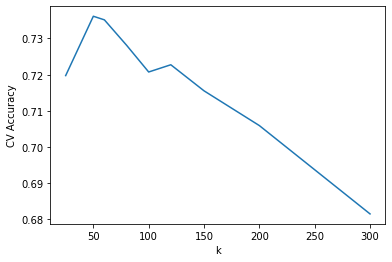

In [ ]:
plt.plot(ks, ac)
plt.xlabel('k')
plt.ylabel('CV Accuracy')

In [ ]:
ac

[0.7197463463463464,
 0.736144944944945,
 0.7351449449449449,
 0.7281443443443443,
 0.7207425425425426,
 0.7227427427427427,
 0.7155419419419419,
 0.7059395395395395,
 0.6815353353353354]

In [ ]:
# en iyi sonuç 50 feature seçiminde olduğu için 50 tane feature seçimi ANOVA'ya göre yapılmıştır.
best_feature_number_select = GenericUnivariateSelect(score_func=f_classif, mode="k_best", param=50)
best_X_k = best_feature_number_select.fit_transform(X, y)
best_score = cross_val_score(lr, best_X_k, y, cv=5).mean()
best_X_k.shape

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(4999, 50)

In [ ]:
best_feature_number_select.get_feature_names_out() #the most important 50 feature names

array(['dd', 'db', 'section_names_.data', 'section_names_.rdata',
       'section_names_.text', 'TB_00', 'TB_01', 'TB_02', 'TB_03', 'TB_11',
       'TB_12', 'TB_13', 'TB_20', 'TB_22', 'TB_31', 'TB_32', 'TB_33',
       'TB_8b', 'TB_cc', 'TB_ff', 'regs_ah', 'regs_bh', 'regs_ch',
       'regs_dh', 'regs_eax', 'asm_commands_dd', 'asm_commands_mov',
       'asm_commands_or', 'FileSize', 'Offset.1', 'dd5',
       'string_len_counts_1', 'string_len_counts_2',
       'string_len_counts_0_10', 'string_len_counts_0_100',
       'string_total_len', 'Img14', 'Img19', 'Img40', 'Img45',
       'line_count_asm', 'size_asm', 'Plus', 'Bracket_Open',
       'Bracket_Close', 'ExtendedAscii', 'Img0.1', 'Img1.1', 'Img106',
       'Img107'], dtype=object)

In [ ]:
best_X_k.shape

(4999, 50)

In [ ]:
best_df_X = pd.DataFrame(best_X_k, columns = ['dd', 'db', 'section_names_.data', 'section_names_.rdata',
       'section_names_.text', 'TB_00', 'TB_01', 'TB_02', 'TB_03', 'TB_11',
       'TB_12', 'TB_13', 'TB_20', 'TB_22', 'TB_31', 'TB_32', 'TB_33',
       'TB_8b', 'TB_cc', 'TB_ff', 'regs_ah', 'regs_bh', 'regs_ch',
       'regs_dh', 'regs_eax', 'asm_commands_dd', 'asm_commands_mov',
       'asm_commands_or', 'FileSize', 'Offset.1', 'dd5',
       'string_len_counts_1', 'string_len_counts_2',
       'string_len_counts_0_10', 'string_len_counts_0_100',
       'string_total_len', 'Img14', 'Img19', 'Img40', 'Img45',
       'line_count_asm', 'size_asm', 'Plus', 'Bracket_Open',
       'Bracket_Close', 'ExtendedAscii', 'Img0.1', 'Img1.1', 'Img106',
       'Img107'])
best_df_X

,dd,db,section_names_.data,section_names_.rdata,section_names_.text,TB_00,TB_01,TB_02,TB_03,TB_11,...,line_count_asm,size_asm,Plus,Bracket_Open,Bracket_Close,ExtendedAscii,Img0.1,Img1.1,Img106,Img107
0,87450.000000,6.387700e+04,24568.0,26405.0,109939.000000,39755.000000,49536.54806,55116.904226,7186.0,82615.903039,...,118529.000000,6874624.0,89956.000000,2359.0,2399.0,15087.00000,-3.564783e+04,173532.591373,171979.000000,162674.0
1,2911.000000,5.817000e+03,4595.0,0.0,10368.000000,19764.000000,710.00000,302.000000,433.0,242.000000,...,98253.227205,460288.0,4772.000000,1619.0,1618.0,579.00000,2.328877e+05,-144114.854823,7702.000000,6551.0
2,671.000000,1.367070e+06,1366754.0,1794.0,22430.000000,601905.000000,3905.00000,2816.000000,3832.0,2740.000000,...,90625.000000,5256192.0,6027.000000,4103.0,3697.0,385051.00000,2.267161e+05,114301.779049,151324.169975,12946.0
3,65917.000000,1.319000e+03,662.0,1093.0,68883.000000,93506.000000,9542.00000,2568.000000,2438.0,2611.000000,...,83201.000000,4825600.0,66527.000000,526.0,526.0,138.00000,6.587196e+04,230313.046232,122247.000000,98621.0
4,106.000000,1.390000e+02,57.0,323.0,744.000000,21091.000000,1213.00000,726.000000,817.0,407.000000,...,12289.000000,712704.0,216.000000,125.0,125.0,46020.42304,1.049326e+05,-11741.610835,15501.000000,11864.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,145.000000,8.081200e+04,65552.0,15937.0,676.000000,30303.248593,325.00000,330.000000,389.0,334.000000,...,9729.000000,564224.0,641.000000,476.0,453.0,38809.00000,7.590169e+04,107510.211407,7100.000000,6002.0
4995,171.000000,1.625000e+03,1065.0,640.0,2186.000000,7526.000000,4330.00000,3086.000000,3165.0,3056.000000,...,252838.342877,11329024.0,360.000000,166.0,165.0,136.00000,2.335213e+06,46835.866937,69304.000000,65638.0
4996,176.000000,3.357940e+04,1022.0,220.0,981.000000,11344.000000,5641.00000,3259.000000,3369.0,3294.000000,...,146689.000000,8507904.0,36112.987073,86.0,86.0,0.00000,1.695603e+06,90099.249079,71789.000000,68354.0
4997,17722.117177,9.175662e+05,31313.0,863731.0,41679.914704,68771.000000,22244.00000,21252.000000,20917.0,19138.000000,...,76608.000000,4443250.0,7592.000000,5389.0,5107.0,265184.00000,2.384466e+05,376803.852722,89989.000000,70139.0


In [ ]:
#concatenate 50 features and target
best_df = best_df_X
best_df['target'] = y

# split 
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(best_df_X, y, test_size=0.30, random_state=4)


## K-FOLD ALGORITHM PREPERATION

---



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

skf = StratifiedKFold(n_splits=10)


## LOGISTIC REGRESSION WITK K-FOLD

---



In [ ]:
#logistic regression and it's scores.
#best_df_X has 50 features.
score_lr=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), best_df_X, y,cv=skf)
print(score_lr)
print("Avg :",np.average(score_lr))

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[0.728      0.74       0.748      0.772      0.74       0.714
 0.752      0.71       0.748      0.73146293]
Avg : 0.7383462925851704


## DESICION TREE CLASSIFIER WITH GRID SEARCH

---



In [ ]:
from sklearn import tree as tr

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


tree = DecisionTreeClassifier(max_depth=10)
param_grid = [
  {'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 10],
   'max_depth': [ 20, 22, 24, 26, 28, 30],
   'criterion': ['gini', 'entropy']},
 ]

clf = GridSearchCV(tree, param_grid, cv=5)  
clf.fit(X_train_best, y_train_best)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=10),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [20, 22, 24, 26, 28, 30],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 10]}])

In [ ]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2}

In [ ]:


# Create Decision Tree classifer object
clf = DecisionTreeClassifier( criterion= 'entropy', max_depth = 20, min_samples_split=2 )

# Train Decision Tree Classifer
clf = clf.fit(X_train_best,y_train_best)

#Predict the response for test dataset
y_pred1 = clf.predict(X_test_best)

In [ ]:
# Model Accuracy, how often is the classifier correct?
#there is overfitting problem!
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
#overfit problem!!

Accuracy: 1.0


In [ ]:
#desicion tree score for 50 selected features
# because of overfitting here comes cross validation to make model stable
cross_val_score1 = cross_val_score(DecisionTreeClassifier(criterion= 'entropy',max_depth = 20, min_samples_split=2 ), best_X_k, y, cv=skf).mean()
print("K-fold cross validation score:", cross_val_score1)

K-fold cross validation score: 0.7919643286573147


## RANDOM FOREST MODEL WITH GRID SEARCH

---



In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_best,y_train_best)

y_pred=clf.predict(X_test_best)

In [ ]:

print("Accuracy:",metrics.accuracy_score(y_test_best, y_pred))

Accuracy: 0.9386666666666666


In [ ]:
randomForest = RandomForestClassifier(max_depth=10)
param_grid = [
  {'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 10],
   'max_depth': [ 20, 22, 24, 26, 28, 30],
   'criterion': ['gini', 'entropy']},
 ]

clf2 = GridSearchCV(randomForest, param_grid, cv=5)  
clf2.fit(X_train_best, y_train_best)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [20, 22, 24, 26, 28, 30],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 10]}])

In [ ]:
clf2.best_params_

{'criterion': 'gini', 'max_depth': 28, 'min_samples_split': 7}

In [ ]:
#random forest score for 50 selected features
cross_val_score2 = cross_val_score(RandomForestClassifier(criterion= 'gini',max_depth = 28, min_samples_split=3 ), best_X_k, y, cv=skf).mean()
print("K-fold cross validation score:", cross_val_score2)

#Although optimal max split score should be 7, as far as I know increasing the samples split is not good. So, min_samples_splir = 3 here.

K-fold cross validation score: 0.9041835671342685


## KNN-CLASSIFIER WITH GRID SEARCH 

---



In [ ]:

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train_best, y_train_best)

#Predict the response for test dataset
y_pred2 = knn.predict(X_test_best)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_best, y_pred2))

Accuracy: 0.8366666666666667


In [ ]:
param_grid = [
  {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 10]}
 ]

clf4 = GridSearchCV(knn, param_grid, cv=5)  
clf4.fit(X_train_best, y_train_best)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 10]}])

In [ ]:
clf4.best_params_

{'n_neighbors': 6}

In [ ]:
#knn cross validation score for 50 selected features
cross_val_score3 = cross_val_score(KNeighborsClassifier(n_neighbors=6), best_X_k, y, cv=skf).mean()
print("KNN cross validation score:", cross_val_score3)

KNN cross validation score: 0.8383675350701403


## GAUSSIAN NAIVE BAYES 

---



In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train_best, y_train_best)

#Predict the response for test dataset
y_pred3 = gnb.predict(X_test_best)

In [ ]:
#The assumption of independent features. 
#In practice, it is almost impossible that model will get a set of predictors which are entirely independent.
#So accuracy is lower than the others. 
print("Accuracy:",metrics.accuracy_score(y_test_best, y_pred3))

#Since cross validation cause lower score, there is no cross validation.

Accuracy: 0.6126666666666667


## K-MEANS ALGORITHM, ELBOW METHOD AND GRID SEARCH

---



In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train_best, y_train_best)
kmeans = KMeans( n_clusters=4, max_iter=200, algorithm = 'auto')
kmeans.fit(X_scaled)

KMeans(max_iter=200, n_clusters=4)

In [ ]:
y_pred4 = kmeans.predict(X_test_best)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_best, y_pred4))

Accuracy: 0.024


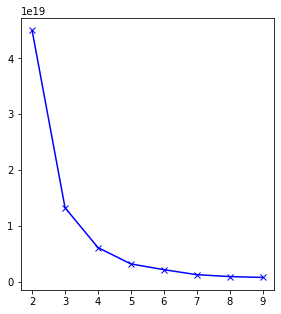

In [ ]:
scores = []
#elbow method
for k in range(2, 10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df)
  scores.append( -kmeans.score(df) )
  
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.plot([k for k in range(2,10)], scores, 'bx-')

In [ ]:
param_grid = [
  {'n_clusters': [2, 3, 4, 5, 6, 7, 8,9, 10],
   'max_iter': [100,200,300,400,500]}
 ]

clf5 = GridSearchCV(kmeans, param_grid, cv=5)  
clf5.fit(X_train_best, y_train_best)

GridSearchCV(cv=5, estimator=KMeans(max_iter=200, n_clusters=4),
             param_grid=[{'max_iter': [100, 200, 300, 400, 500],
                          'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10]}])

In [ ]:
clf5.best_params_

{'max_iter': 200, 'n_clusters': 10}

In [ ]:
cross_val_score4 = cross_val_score(KMeans( n_clusters=9, max_iter=200, algorithm = 'auto'), best_X_k, y, cv=skf).mean()
print("Kmean cross validation score:", cross_val_score4)
#Why this is negative ? 

Kmean cross validation score: -7.939284320309414e+16


## XGBCLASSIFIER WITH GRID SEARCH

---



In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

#Train the model using the training sets
xgb.fit(X_train_best, y_train_best)

#Predict the response for test dataset
y_pred5 = xgb.predict(X_test_best)
print("Accuracy:",metrics.accuracy_score(y_test_best, y_pred5))
#overfitting problem!!

Accuracy: 1.0


In [ ]:
param_grid = [
  {
   'max_depth': [ 5,8,10]
   },
 ]
clf6 = GridSearchCV(xgb, param_grid, cv=5)  
clf6.fit(X_train_best, y_train_best)

GridSearchCV(cv=5, estimator=XGBClassifier(objective='multi:softprob'),
             param_grid=[{'max_depth': [5, 8, 10]}])

In [ ]:
clf6.best_params_

{'max_depth': 8}

In [ ]:
#xgb cross validation score for 50 selected features
cross_val_score4 = cross_val_score(XGBClassifier(max_depth = 8), best_X_k, y, cv=skf).mean()
print("XGB cross validation score:", cross_val_score4)

XGB cross validation score: 0.9025819639278557
